# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 19760 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all)


  0% (    1 of 19760) |            | Elapsed Time: 0:00:26 ETA:  6 days, 1:33:36

  0% (   75 of 19760) |                    | Elapsed Time: 0:00:27 ETA:  0:03:59

  0% (  153 of 19760) |                    | Elapsed Time: 0:00:28 ETA:  0:03:52

  1% (  228 of 19760) |                    | Elapsed Time: 0:00:29 ETA:  0:03:53

  1% (  247 of 19760) |                    | Elapsed Time: 0:00:29 ETA:  0:03:55

  1% (  323 of 19760) |                    | Elapsed Time: 0:00:30 ETA:  0:03:53

  2% (  396 of 19760) |                    | Elapsed Time: 0:00:31 ETA:  0:03:54

  2% (  472 of 19760) |                    | Elapsed Time: 0:00:32 ETA:  0:03:52

  2% (  494 of 19760) |                    | Elapsed Time: 0:00:33 ETA:  0:03:52

  2% (  570 of 19760) |                    | Elapsed Time: 0:00:34 ETA:  0:03:50

  3% (  647 of 19760) |                    | Elapsed Time: 0:00:35 ETA:  0:03:48

  3% (  719 of 19760) |                    | Elapsed Time: 0:00:36 ETA:  0:03:50

  3% (  741 of 19760) |                    | Elapsed Time: 0:00:36 ETA:  0:03:49

  4% (  811 of 19760) |                    | Elapsed Time: 0:00:37 ETA:  0:03:49

  4% (  884 of 19760) |                    | Elapsed Time: 0:00:38 ETA:  0:03:50

  4% (  956 of 19760) |                    | Elapsed Time: 0:00:39 ETA:  0:03:49

  5% (  988 of 19760) |#                   | Elapsed Time: 0:00:39 ETA:  0:03:49

  5% ( 1058 of 19760) |#                   | Elapsed Time: 0:00:40 ETA:  0:03:50

  5% ( 1132 of 19760) |#                   | Elapsed Time: 0:00:41 ETA:  0:03:50

  6% ( 1211 of 19760) |#                   | Elapsed Time: 0:00:42 ETA:  0:03:48

  6% ( 1235 of 19760) |#                   | Elapsed Time: 0:00:43 ETA:  0:03:47

  6% ( 1312 of 19760) |#                   | Elapsed Time: 0:00:44 ETA:  0:03:45

  7% ( 1390 of 19760) |#                   | Elapsed Time: 0:00:45 ETA:  0:03:40

  7% ( 1437 of 19760) |#                   | Elapsed Time: 0:00:46 ETA:  0:04:09

  7% ( 1482 of 19760) |#                   | Elapsed Time: 0:00:47 ETA:  0:04:10

  7% ( 1552 of 19760) |#                   | Elapsed Time: 0:00:48 ETA:  0:04:09

  8% ( 1626 of 19760) |#                   | Elapsed Time: 0:00:49 ETA:  0:04:06

  8% ( 1699 of 19760) |#                   | Elapsed Time: 0:00:50 ETA:  0:04:06

  8% ( 1729 of 19760) |#                   | Elapsed Time: 0:00:50 ETA:  0:04:11

  9% ( 1805 of 19760) |#                   | Elapsed Time: 0:00:51 ETA:  0:04:06

  9% ( 1880 of 19760) |#                   | Elapsed Time: 0:00:52 ETA:  0:04:06

  9% ( 1955 of 19760) |#                   | Elapsed Time: 0:00:53 ETA:  0:04:07

 10% ( 1976 of 19760) |##                  | Elapsed Time: 0:00:54 ETA:  0:03:35

 10% ( 2047 of 19760) |##                  | Elapsed Time: 0:00:55 ETA:  0:03:35

 10% ( 2114 of 19760) |##                  | Elapsed Time: 0:00:56 ETA:  0:03:35

 11% ( 2185 of 19760) |##                  | Elapsed Time: 0:00:57 ETA:  0:03:36

 11% ( 2223 of 19760) |##                  | Elapsed Time: 0:00:57 ETA:  0:03:35

 11% ( 2295 of 19760) |##                  | Elapsed Time: 0:00:58 ETA:  0:03:35

 11% ( 2370 of 19760) |##                  | Elapsed Time: 0:00:59 ETA:  0:03:34

 12% ( 2443 of 19760) |##                  | Elapsed Time: 0:01:00 ETA:  0:03:34

 12% ( 2470 of 19760) |##                  | Elapsed Time: 0:01:01 ETA:  0:03:35

 12% ( 2552 of 19760) |##                  | Elapsed Time: 0:01:02 ETA:  0:03:30

 13% ( 2628 of 19760) |##                  | Elapsed Time: 0:01:03 ETA:  0:03:27

 13% ( 2700 of 19760) |##                  | Elapsed Time: 0:01:04 ETA:  0:03:24

 13% ( 2717 of 19760) |##                  | Elapsed Time: 0:01:04 ETA:  0:03:25

 14% ( 2795 of 19760) |##                  | Elapsed Time: 0:01:05 ETA:  0:03:21

 14% ( 2863 of 19760) |##                  | Elapsed Time: 0:01:06 ETA:  0:03:22

 14% ( 2938 of 19760) |##                  | Elapsed Time: 0:01:07 ETA:  0:03:21

 15% ( 2964 of 19760) |###                 | Elapsed Time: 0:01:07 ETA:  0:03:19

 15% ( 3041 of 19760) |###                 | Elapsed Time: 0:01:08 ETA:  0:03:16

 15% ( 3114 of 19760) |###                 | Elapsed Time: 0:01:09 ETA:  0:03:19

 16% ( 3182 of 19760) |###                 | Elapsed Time: 0:01:10 ETA:  0:03:22

 16% ( 3211 of 19760) |###                 | Elapsed Time: 0:01:11 ETA:  0:03:20

 16% ( 3281 of 19760) |###                 | Elapsed Time: 0:01:12 ETA:  0:03:19

 16% ( 3344 of 19760) |###                 | Elapsed Time: 0:01:13 ETA:  0:03:25

 17% ( 3413 of 19760) |###                 | Elapsed Time: 0:01:14 ETA:  0:03:23

 17% ( 3458 of 19760) |###                 | Elapsed Time: 0:01:14 ETA:  0:03:24

 17% ( 3531 of 19760) |###                 | Elapsed Time: 0:01:15 ETA:  0:03:23

 18% ( 3605 of 19760) |###                 | Elapsed Time: 0:01:16 ETA:  0:03:24

 18% ( 3677 of 19760) |###                 | Elapsed Time: 0:01:17 ETA:  0:03:24

 18% ( 3705 of 19760) |###                 | Elapsed Time: 0:01:18 ETA:  0:03:20

 19% ( 3778 of 19760) |###                 | Elapsed Time: 0:01:19 ETA:  0:03:20

 19% ( 3852 of 19760) |###                 | Elapsed Time: 0:01:20 ETA:  0:03:17

 19% ( 3930 of 19760) |###                 | Elapsed Time: 0:01:21 ETA:  0:03:09

 20% ( 3952 of 19760) |####                | Elapsed Time: 0:01:21 ETA:  0:03:05

 20% ( 4030 of 19760) |####                | Elapsed Time: 0:01:22 ETA:  0:03:02

 20% ( 4105 of 19760) |####                | Elapsed Time: 0:01:23 ETA:  0:03:01

 21% ( 4178 of 19760) |####                | Elapsed Time: 0:01:24 ETA:  0:03:00

 21% ( 4199 of 19760) |####                | Elapsed Time: 0:01:24 ETA:  0:02:57

 21% ( 4270 of 19760) |####                | Elapsed Time: 0:01:25 ETA:  0:02:59

 21% ( 4341 of 19760) |####                | Elapsed Time: 0:01:26 ETA:  0:02:59

 22% ( 4420 of 19760) |####                | Elapsed Time: 0:01:27 ETA:  0:02:56

 22% ( 4446 of 19760) |####                | Elapsed Time: 0:01:28 ETA:  0:02:57

 22% ( 4523 of 19760) |####                | Elapsed Time: 0:01:29 ETA:  0:02:56

 23% ( 4577 of 19760) |####                | Elapsed Time: 0:01:30 ETA:  0:03:34

 23% ( 4644 of 19760) |####                | Elapsed Time: 0:01:31 ETA:  0:03:38

 23% ( 4693 of 19760) |####                | Elapsed Time: 0:01:32 ETA:  0:03:38

 24% ( 4770 of 19760) |####                | Elapsed Time: 0:01:33 ETA:  0:03:32

 24% ( 4850 of 19760) |####                | Elapsed Time: 0:01:34 ETA:  0:03:26

 24% ( 4921 of 19760) |####                | Elapsed Time: 0:01:35 ETA:  0:03:25

 25% ( 4940 of 19760) |#####               | Elapsed Time: 0:01:35 ETA:  0:03:32

 25% ( 5016 of 19760) |#####               | Elapsed Time: 0:01:36 ETA:  0:03:26

 25% ( 5098 of 19760) |#####               | Elapsed Time: 0:01:37 ETA:  0:03:23

 26% ( 5187 of 19760) |#####               | Elapsed Time: 0:01:38 ETA:  0:02:38

 26% ( 5267 of 19760) |#####               | Elapsed Time: 0:01:40 ETA:  0:02:36

 27% ( 5343 of 19760) |#####               | Elapsed Time: 0:01:41 ETA:  0:02:35

 27% ( 5434 of 19760) |#####               | Elapsed Time: 0:01:42 ETA:  0:02:33

 27% ( 5518 of 19760) |#####               | Elapsed Time: 0:01:43 ETA:  0:02:28

 28% ( 5594 of 19760) |#####               | Elapsed Time: 0:01:44 ETA:  0:02:27

 28% ( 5681 of 19760) |#####               | Elapsed Time: 0:01:45 ETA:  0:02:31

 29% ( 5755 of 19760) |#####               | Elapsed Time: 0:01:46 ETA:  0:02:31

 29% ( 5833 of 19760) |#####               | Elapsed Time: 0:01:47 ETA:  0:02:31

 29% ( 5907 of 19760) |#####               | Elapsed Time: 0:01:48 ETA:  0:02:31

 30% ( 5928 of 19760) |######              | Elapsed Time: 0:01:48 ETA:  0:02:31

 30% ( 6005 of 19760) |######              | Elapsed Time: 0:01:49 ETA:  0:02:30

 30% ( 6077 of 19760) |######              | Elapsed Time: 0:01:50 ETA:  0:02:35

 31% ( 6145 of 19760) |######              | Elapsed Time: 0:01:51 ETA:  0:02:38

 31% ( 6175 of 19760) |######              | Elapsed Time: 0:01:52 ETA:  0:02:36

 31% ( 6226 of 19760) |######              | Elapsed Time: 0:01:53 ETA:  0:02:47

 31% ( 6285 of 19760) |######              | Elapsed Time: 0:01:54 ETA:  0:02:54

 32% ( 6354 of 19760) |######              | Elapsed Time: 0:01:55 ETA:  0:02:58

 32% ( 6422 of 19760) |######              | Elapsed Time: 0:01:56 ETA:  0:03:02

 32% ( 6494 of 19760) |######              | Elapsed Time: 0:01:57 ETA:  0:03:04

 33% ( 6573 of 19760) |######              | Elapsed Time: 0:01:58 ETA:  0:02:58

 33% ( 6652 of 19760) |######              | Elapsed Time: 0:01:59 ETA:  0:02:51

 33% ( 6669 of 19760) |######              | Elapsed Time: 0:01:59 ETA:  0:02:52

 34% ( 6748 of 19760) |######              | Elapsed Time: 0:02:00 ETA:  0:02:35

 34% ( 6827 of 19760) |######              | Elapsed Time: 0:02:01 ETA:  0:02:23

 34% ( 6899 of 19760) |######              | Elapsed Time: 0:02:02 ETA:  0:02:20

 35% ( 6916 of 19760) |#######             | Elapsed Time: 0:02:02 ETA:  0:02:16

 35% ( 6985 of 19760) |#######             | Elapsed Time: 0:02:03 ETA:  0:02:18

 35% ( 7058 of 19760) |#######             | Elapsed Time: 0:02:04 ETA:  0:02:17

 36% ( 7129 of 19760) |#######             | Elapsed Time: 0:02:05 ETA:  0:02:20

 36% ( 7163 of 19760) |#######             | Elapsed Time: 0:02:06 ETA:  0:02:22

 36% ( 7244 of 19760) |#######             | Elapsed Time: 0:02:07 ETA:  0:02:18

 37% ( 7323 of 19760) |#######             | Elapsed Time: 0:02:08 ETA:  0:02:17

 37% ( 7410 of 19760) |#######             | Elapsed Time: 0:02:09 ETA:  0:02:14

 37% ( 7484 of 19760) |#######             | Elapsed Time: 0:02:10 ETA:  0:02:13

 38% ( 7552 of 19760) |#######             | Elapsed Time: 0:02:11 ETA:  0:02:13

 38% ( 7628 of 19760) |#######             | Elapsed Time: 0:02:12 ETA:  0:02:10

 38% ( 7657 of 19760) |#######             | Elapsed Time: 0:02:12 ETA:  0:02:07

 39% ( 7737 of 19760) |#######             | Elapsed Time: 0:02:13 ETA:  0:02:05

 39% ( 7807 of 19760) |#######             | Elapsed Time: 0:02:14 ETA:  0:02:09

 39% ( 7884 of 19760) |#######             | Elapsed Time: 0:02:15 ETA:  0:02:09

 40% ( 7904 of 19760) |########            | Elapsed Time: 0:02:15 ETA:  0:02:10

 40% ( 7976 of 19760) |########            | Elapsed Time: 0:02:16 ETA:  0:02:11

 40% ( 8053 of 19760) |########            | Elapsed Time: 0:02:17 ETA:  0:02:09

 41% ( 8127 of 19760) |########            | Elapsed Time: 0:02:18 ETA:  0:02:05

 41% ( 8151 of 19760) |########            | Elapsed Time: 0:02:19 ETA:  0:02:05

 41% ( 8226 of 19760) |########            | Elapsed Time: 0:02:20 ETA:  0:02:05

 42% ( 8301 of 19760) |########            | Elapsed Time: 0:02:21 ETA:  0:02:06

 42% ( 8381 of 19760) |########            | Elapsed Time: 0:02:22 ETA:  0:02:00

 42% ( 8398 of 19760) |########            | Elapsed Time: 0:02:22 ETA:  0:02:01

 42% ( 8475 of 19760) |########            | Elapsed Time: 0:02:23 ETA:  0:01:59

 43% ( 8497 of 19760) |########            | Elapsed Time: 0:02:25 ETA:  0:02:58

 43% ( 8566 of 19760) |########            | Elapsed Time: 0:02:26 ETA:  0:03:02

 43% ( 8645 of 19760) |########            | Elapsed Time: 0:02:27 ETA:  0:03:05

 44% ( 8716 of 19760) |########            | Elapsed Time: 0:02:28 ETA:  0:03:07

 44% ( 8770 of 19760) |########            | Elapsed Time: 0:02:29 ETA:  0:03:21

 44% ( 8837 of 19760) |########            | Elapsed Time: 0:02:30 ETA:  0:03:30

 45% ( 8892 of 19760) |#########           | Elapsed Time: 0:02:31 ETA:  0:03:28

 45% ( 8956 of 19760) |#########           | Elapsed Time: 0:02:32 ETA:  0:03:36

 45% ( 9036 of 19760) |#########           | Elapsed Time: 0:02:33 ETA:  0:02:21

 46% ( 9111 of 19760) |#########           | Elapsed Time: 0:02:34 ETA:  0:02:17

 46% ( 9139 of 19760) |#########           | Elapsed Time: 0:02:34 ETA:  0:02:16

 46% ( 9194 of 19760) |#########           | Elapsed Time: 0:02:35 ETA:  0:02:22

 46% ( 9269 of 19760) |#########           | Elapsed Time: 0:02:36 ETA:  0:02:19

 47% ( 9320 of 19760) |#########           | Elapsed Time: 0:02:37 ETA:  0:02:20

 47% ( 9386 of 19760) |#########           | Elapsed Time: 0:02:38 ETA:  0:02:19

 47% ( 9458 of 19760) |#########           | Elapsed Time: 0:02:39 ETA:  0:02:13

 48% ( 9534 of 19760) |#########           | Elapsed Time: 0:02:40 ETA:  0:02:06

 48% ( 9610 of 19760) |#########           | Elapsed Time: 0:02:41 ETA:  0:02:07

 48% ( 9633 of 19760) |#########           | Elapsed Time: 0:02:42 ETA:  0:02:10

 49% ( 9709 of 19760) |#########           | Elapsed Time: 0:02:43 ETA:  0:02:06

 49% ( 9778 of 19760) |#########           | Elapsed Time: 0:02:44 ETA:  0:01:58

 49% ( 9853 of 19760) |#########           | Elapsed Time: 0:02:45 ETA:  0:01:57

 50% ( 9880 of 19760) |##########          | Elapsed Time: 0:02:45 ETA:  0:01:46

 50% ( 9954 of 19760) |##########          | Elapsed Time: 0:02:46 ETA:  0:01:41

 50% (10030 of 19760) |##########          | Elapsed Time: 0:02:47 ETA:  0:01:39

 51% (10105 of 19760) |##########          | Elapsed Time: 0:02:48 ETA:  0:01:38

 51% (10127 of 19760) |##########          | Elapsed Time: 0:02:48 ETA:  0:01:38

 51% (10206 of 19760) |##########          | Elapsed Time: 0:02:49 ETA:  0:01:34

 52% (10286 of 19760) |##########          | Elapsed Time: 0:02:50 ETA:  0:01:31

 52% (10356 of 19760) |##########          | Elapsed Time: 0:02:51 ETA:  0:01:30

 52% (10374 of 19760) |##########          | Elapsed Time: 0:02:52 ETA:  0:01:30

 52% (10448 of 19760) |##########          | Elapsed Time: 0:02:53 ETA:  0:01:30

 53% (10515 of 19760) |##########          | Elapsed Time: 0:02:54 ETA:  0:01:32

 53% (10591 of 19760) |##########          | Elapsed Time: 0:02:55 ETA:  0:01:31

 53% (10621 of 19760) |##########          | Elapsed Time: 0:02:55 ETA:  0:01:31

 54% (10690 of 19760) |##########          | Elapsed Time: 0:02:56 ETA:  0:01:33

 54% (10763 of 19760) |##########          | Elapsed Time: 0:02:57 ETA:  0:01:35

 54% (10844 of 19760) |##########          | Elapsed Time: 0:02:58 ETA:  0:01:34

 55% (10868 of 19760) |###########         | Elapsed Time: 0:02:58 ETA:  0:01:31

 55% (10948 of 19760) |###########         | Elapsed Time: 0:02:59 ETA:  0:01:27

 55% (11027 of 19760) |###########         | Elapsed Time: 0:03:01 ETA:  0:01:24

 56% (11115 of 19760) |###########         | Elapsed Time: 0:03:02 ETA:  0:01:19

 56% (11195 of 19760) |###########         | Elapsed Time: 0:03:03 ETA:  0:01:16

 57% (11271 of 19760) |###########         | Elapsed Time: 0:03:04 ETA:  0:01:12

 57% (11348 of 19760) |###########         | Elapsed Time: 0:03:05 ETA:  0:01:09

 57% (11362 of 19760) |###########         | Elapsed Time: 0:03:05 ETA:  0:01:12

 57% (11438 of 19760) |###########         | Elapsed Time: 0:03:06 ETA:  0:01:11

 58% (11516 of 19760) |###########         | Elapsed Time: 0:03:07 ETA:  0:01:10

 58% (11589 of 19760) |###########         | Elapsed Time: 0:03:08 ETA:  0:01:12

 58% (11609 of 19760) |###########         | Elapsed Time: 0:03:08 ETA:  0:01:12

 59% (11686 of 19760) |###########         | Elapsed Time: 0:03:09 ETA:  0:01:10

 59% (11764 of 19760) |###########         | Elapsed Time: 0:03:10 ETA:  0:01:11

 59% (11838 of 19760) |###########         | Elapsed Time: 0:03:11 ETA:  0:01:11

 60% (11856 of 19760) |############        | Elapsed Time: 0:03:11 ETA:  0:01:12

 60% (11934 of 19760) |############        | Elapsed Time: 0:03:13 ETA:  0:01:09

 60% (12017 of 19760) |############        | Elapsed Time: 0:03:14 ETA:  0:01:05

 61% (12103 of 19760) |############        | Elapsed Time: 0:03:15 ETA:  0:01:01

 61% (12185 of 19760) |############        | Elapsed Time: 0:03:16 ETA:  0:00:57

 62% (12267 of 19760) |############        | Elapsed Time: 0:03:17 ETA:  0:00:54

 62% (12350 of 19760) |############        | Elapsed Time: 0:03:18 ETA:  0:00:50

 62% (12424 of 19760) |############        | Elapsed Time: 0:03:19 ETA:  0:00:50

 63% (12500 of 19760) |############        | Elapsed Time: 0:03:20 ETA:  0:00:50

 63% (12581 of 19760) |############        | Elapsed Time: 0:03:21 ETA:  0:00:50

 63% (12597 of 19760) |############        | Elapsed Time: 0:03:21 ETA:  0:00:50

 64% (12669 of 19760) |############        | Elapsed Time: 0:03:22 ETA:  0:00:52

 64% (12747 of 19760) |############        | Elapsed Time: 0:03:23 ETA:  0:00:53

 64% (12826 of 19760) |############        | Elapsed Time: 0:03:24 ETA:  0:00:53

 65% (12844 of 19760) |#############       | Elapsed Time: 0:03:24 ETA:  0:00:53

 65% (12922 of 19760) |#############       | Elapsed Time: 0:03:25 ETA:  0:00:52

 65% (12998 of 19760) |#############       | Elapsed Time: 0:03:26 ETA:  0:00:50

 66% (13091 of 19760) |#############       | Elapsed Time: 0:03:27 ETA:  0:00:50

 66% (13162 of 19760) |#############       | Elapsed Time: 0:03:28 ETA:  0:00:52

 66% (13238 of 19760) |#############       | Elapsed Time: 0:03:29 ETA:  0:00:49

 67% (13312 of 19760) |#############       | Elapsed Time: 0:03:30 ETA:  0:00:50

 67% (13338 of 19760) |#############       | Elapsed Time: 0:03:32 ETA:  0:01:58

 67% (13408 of 19760) |#############       | Elapsed Time: 0:03:33 ETA:  0:02:03

 68% (13480 of 19760) |#############       | Elapsed Time: 0:03:34 ETA:  0:02:05

 68% (13552 of 19760) |#############       | Elapsed Time: 0:03:35 ETA:  0:02:08

 68% (13585 of 19760) |#############       | Elapsed Time: 0:03:36 ETA:  0:02:06

 69% (13660 of 19760) |#############       | Elapsed Time: 0:03:37 ETA:  0:02:02

 69% (13734 of 19760) |#############       | Elapsed Time: 0:03:38 ETA:  0:02:03

 69% (13808 of 19760) |#############       | Elapsed Time: 0:03:39 ETA:  0:02:02

 70% (13832 of 19760) |##############      | Elapsed Time: 0:03:39 ETA:  0:00:53

 70% (13913 of 19760) |##############      | Elapsed Time: 0:03:40 ETA:  0:00:48

 70% (13991 of 19760) |##############      | Elapsed Time: 0:03:41 ETA:  0:00:43

 71% (14079 of 19760) |##############      | Elapsed Time: 0:03:42 ETA:  0:00:39

 71% (14161 of 19760) |##############      | Elapsed Time: 0:03:43 ETA:  0:00:34

 72% (14245 of 19760) |##############      | Elapsed Time: 0:03:44 ETA:  0:00:29

 72% (14326 of 19760) |##############      | Elapsed Time: 0:03:46 ETA:  0:00:24

 72% (14405 of 19760) |##############      | Elapsed Time: 0:03:47 ETA:  0:00:23

 73% (14484 of 19760) |##############      | Elapsed Time: 0:03:48 ETA:  0:00:23

 73% (14562 of 19760) |##############      | Elapsed Time: 0:03:49 ETA:  0:00:22

 73% (14573 of 19760) |##############      | Elapsed Time: 0:03:49 ETA:  0:00:23

 74% (14652 of 19760) |##############      | Elapsed Time: 0:03:50 ETA:  0:00:21

 74% (14731 of 19760) |##############      | Elapsed Time: 0:03:51 ETA:  0:00:21

 75% (14820 of 19760) |###############     | Elapsed Time: 0:03:52 ETA:  0:00:24

 75% (14889 of 19760) |###############     | Elapsed Time: 0:03:53 ETA:  0:00:27

 75% (14968 of 19760) |###############     | Elapsed Time: 0:03:54 ETA:  0:00:26

 76% (15041 of 19760) |###############     | Elapsed Time: 0:03:55 ETA:  0:00:28

 76% (15067 of 19760) |###############     | Elapsed Time: 0:03:55 ETA:  0:00:30

 76% (15143 of 19760) |###############     | Elapsed Time: 0:03:56 ETA:  0:00:26

 77% (15218 of 19760) |###############     | Elapsed Time: 0:03:57 ETA:  0:00:27

 77% (15295 of 19760) |###############     | Elapsed Time: 0:03:58 ETA:  0:00:27

 77% (15314 of 19760) |###############     | Elapsed Time: 0:03:59 ETA:  0:00:26

 77% (15390 of 19760) |###############     | Elapsed Time: 0:04:00 ETA:  0:00:25

 78% (15464 of 19760) |###############     | Elapsed Time: 0:04:01 ETA:  0:00:22

 78% (15541 of 19760) |###############     | Elapsed Time: 0:04:02 ETA:  0:00:22

 78% (15561 of 19760) |###############     | Elapsed Time: 0:04:02 ETA:  0:00:20

 79% (15638 of 19760) |###############     | Elapsed Time: 0:04:03 ETA:  0:00:17

 79% (15719 of 19760) |###############     | Elapsed Time: 0:04:04 ETA:  0:00:14

 80% (15808 of 19760) |################    | Elapsed Time: 0:04:05 ETA:  0:00:11

 80% (15885 of 19760) |################    | Elapsed Time: 0:04:06 ETA:  0:00:11

 80% (15969 of 19760) |################    | Elapsed Time: 0:04:07 ETA:  0:00:06

 81% (16055 of 19760) |################    | Elapsed Time: 0:04:08 ETA:  0:00:05

 81% (16132 of 19760) |################    | Elapsed Time: 0:04:09 ETA:  0:00:04

 82% (16210 of 19760) |################    | Elapsed Time: 0:04:10 ETA:  0:00:03

 82% (16302 of 19760) |################    | Elapsed Time: 0:04:11 ETA:  0:00:03

 82% (16381 of 19760) |################    | Elapsed Time: 0:04:12 ETA:  0:00:02

 83% (16456 of 19760) |################    | Elapsed Time: 0:04:13 ETA:  0:00:02

 83% (16532 of 19760) |################    | Elapsed Time: 0:04:14 ETA:  0:00:04

 83% (16549 of 19760) |################    | Elapsed Time: 0:04:15 ETA:  0:00:03

 84% (16624 of 19760) |################    | Elapsed Time: 0:04:16 ETA:  0:00:02

 84% (16704 of 19760) |################    | Elapsed Time: 0:04:17 ETA:  0:00:00

 85% (16796 of 19760) |#################   | Elapsed Time: 0:04:18 ETA:  0:00:00

 85% (16875 of 19760) |#################   | Elapsed Time: 0:04:19 ETA:  0:00:00

 85% (16956 of 19760) |#################   | Elapsed Time: 0:04:20 ETA:  0:00:00

 86% (17043 of 19760) |#################   | Elapsed Time: 0:04:21 ETA:  0:00:00

 86% (17119 of 19760) |#################   | Elapsed Time: 0:04:22 ETA:  0:00:00

 87% (17195 of 19760) |#################   | Elapsed Time: 0:04:23 ETA:  0:00:00

 87% (17274 of 19760) |#################   | Elapsed Time: 0:04:24 ETA:  0:00:00

 87% (17290 of 19760) |#################   | Elapsed Time: 0:04:24 ETA:  0:00:00

 87% (17371 of 19760) |#################   | Elapsed Time: 0:04:25 ETA:  0:00:00

 88% (17459 of 19760) |#################   | Elapsed Time: 0:04:26 ETA:  0:00:00

 88% (17537 of 19760) |#################   | Elapsed Time: 0:04:27 ETA:  0:00:00

 89% (17607 of 19760) |#################   | Elapsed Time: 0:04:28 ETA:  0:00:00

 89% (17684 of 19760) |#################   | Elapsed Time: 0:04:29 ETA:  0:00:00

 89% (17763 of 19760) |#################   | Elapsed Time: 0:04:30 ETA:  0:00:00

 90% (17784 of 19760) |##################  | Elapsed Time: 0:04:31 ETA:  0:00:00

 90% (17857 of 19760) |##################  | Elapsed Time: 0:04:32 ETA:  0:00:00

 90% (17933 of 19760) |##################  | Elapsed Time: 0:04:33 ETA:  0:00:00

 91% (18008 of 19760) |##################  | Elapsed Time: 0:04:34 ETA:  0:00:00

 91% (18031 of 19760) |##################  | Elapsed Time: 0:04:34 ETA:  0:00:00

 91% (18106 of 19760) |##################  | Elapsed Time: 0:04:35 ETA:  0:00:00

 92% (18186 of 19760) |##################  | Elapsed Time: 0:04:36 ETA:  0:00:00

 92% (18261 of 19760) |##################  | Elapsed Time: 0:04:37 ETA:  0:00:00

 92% (18278 of 19760) |##################  | Elapsed Time: 0:04:37 ETA:  0:00:00

 92% (18358 of 19760) |##################  | Elapsed Time: 0:04:38 ETA:  0:00:00

 93% (18429 of 19760) |##################  | Elapsed Time: 0:04:39 ETA:  0:00:00

 93% (18505 of 19760) |##################  | Elapsed Time: 0:04:40 ETA:  0:00:00

 93% (18525 of 19760) |##################  | Elapsed Time: 0:04:40 ETA:  0:00:00

 94% (18601 of 19760) |##################  | Elapsed Time: 0:04:41 ETA:  0:00:00

 94% (18674 of 19760) |##################  | Elapsed Time: 0:04:42 ETA:  0:00:00

 94% (18749 of 19760) |##################  | Elapsed Time: 0:04:43 ETA:  0:00:00

 95% (18772 of 19760) |################### | Elapsed Time: 0:04:44 ETA:  0:00:00

 95% (18846 of 19760) |################### | Elapsed Time: 0:04:45 ETA:  0:00:00

 95% (18922 of 19760) |################### | Elapsed Time: 0:04:46 ETA:  0:00:00

 96% (19002 of 19760) |################### | Elapsed Time: 0:04:47 ETA:  0:00:00

 96% (19019 of 19760) |################### | Elapsed Time: 0:04:47 ETA:  0:00:00

 96% (19098 of 19760) |################### | Elapsed Time: 0:04:48 ETA:  0:00:00

 97% (19176 of 19760) |################### | Elapsed Time: 0:04:49 ETA:  0:00:00

 97% (19266 of 19760) |################### | Elapsed Time: 0:04:50 ETA:  0:00:00

 97% (19274 of 19760) |################### | Elapsed Time: 0:04:53 ETA:  0:00:52

 97% (19346 of 19760) |################### | Elapsed Time: 0:04:54 ETA:  0:00:52

 98% (19412 of 19760) |################### | Elapsed Time: 0:04:55 ETA:  0:00:59

 98% (19477 of 19760) |################### | Elapsed Time: 0:04:56 ETA:  0:01:09

 98% (19513 of 19760) |################### | Elapsed Time: 0:04:56 ETA:  0:01:08

 99% (19572 of 19760) |################### | Elapsed Time: 0:04:57 ETA:  0:01:22

 99% (19631 of 19760) |################### | Elapsed Time: 0:04:58 ETA:  0:01:38

 99% (19694 of 19760) |################### | Elapsed Time: 0:04:59 ETA:  0:01:48

100% (19760 of 19760) |####################| Elapsed Time: 0:05:00 Time: 0:05:00


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

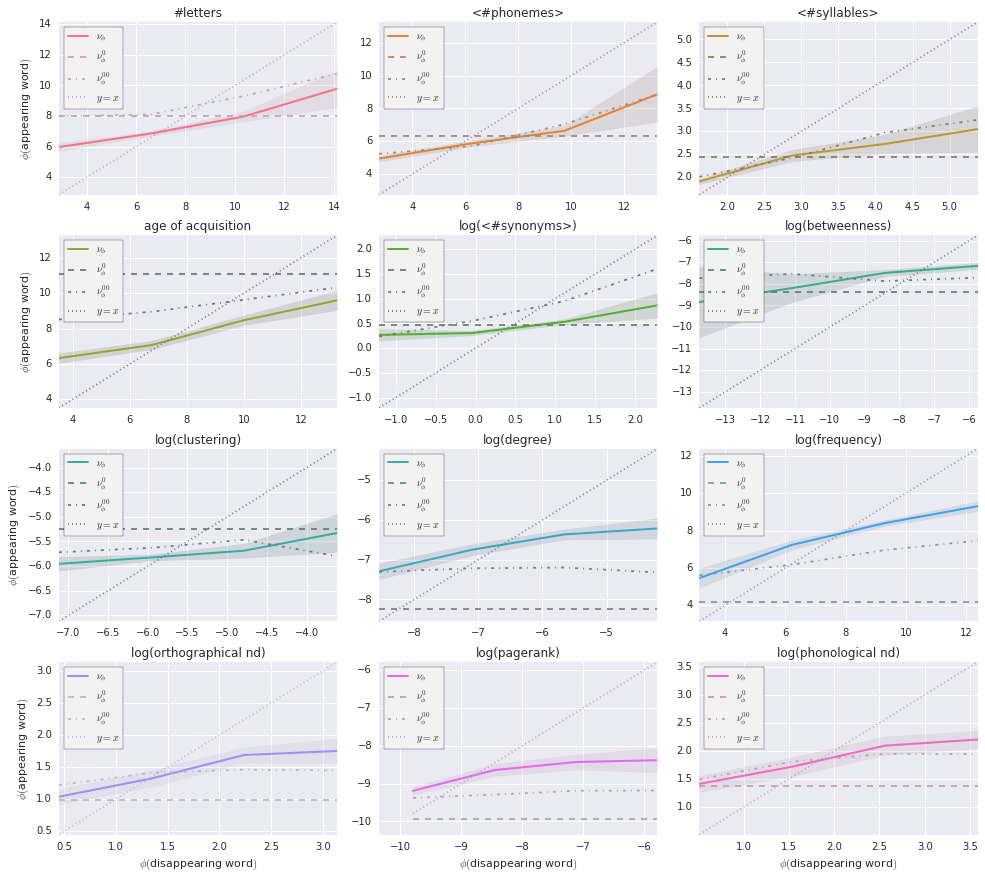

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

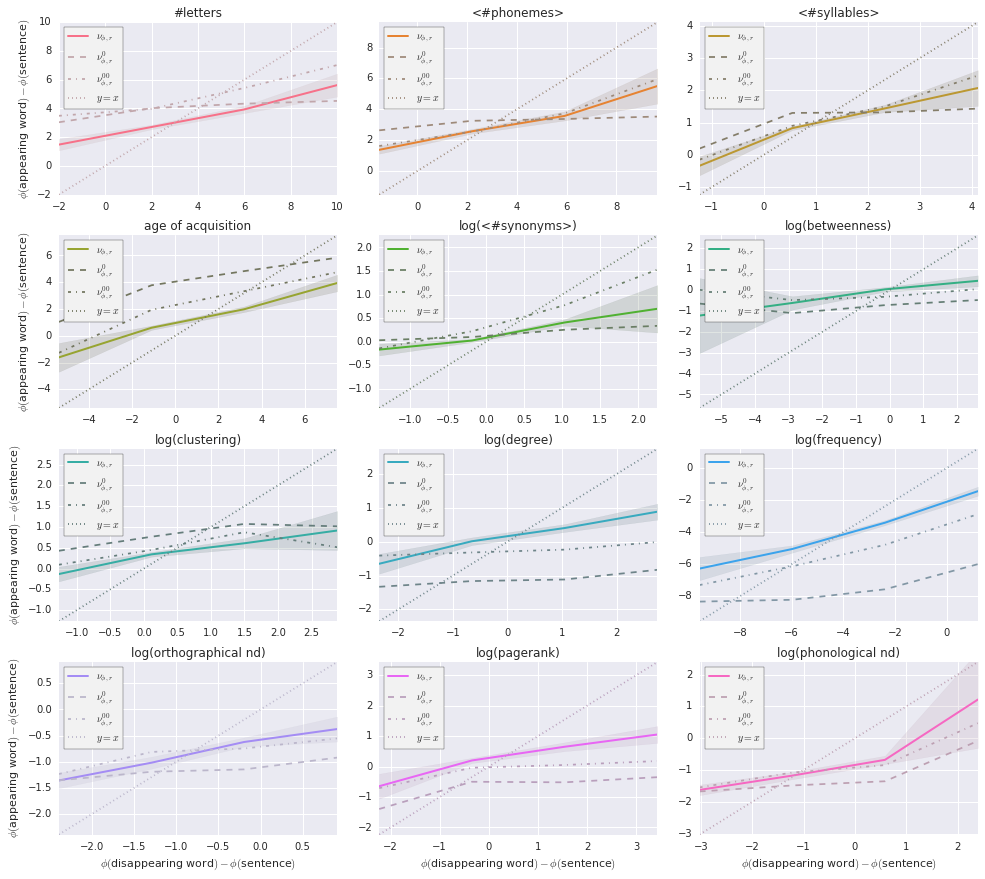

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

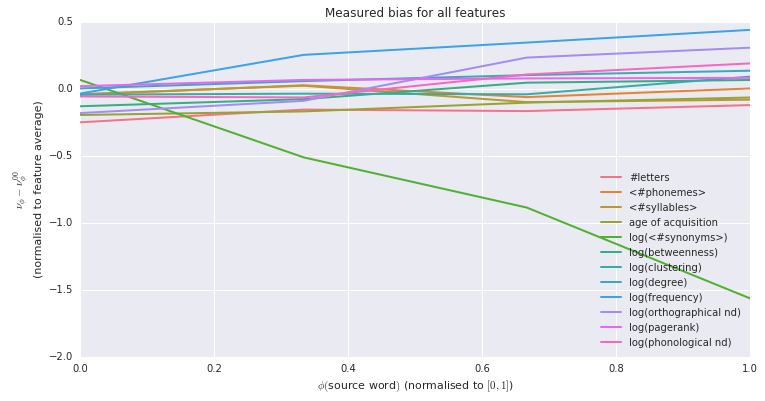

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

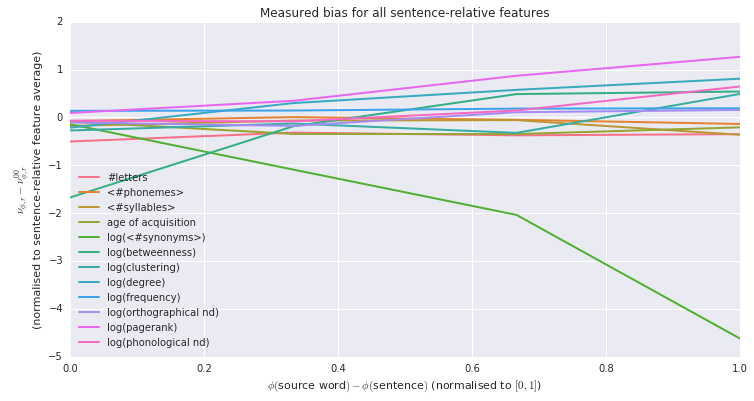

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

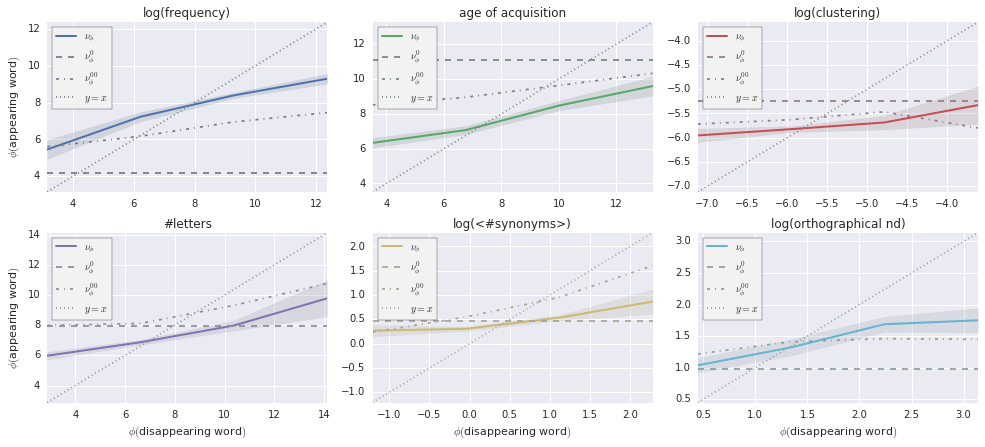

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

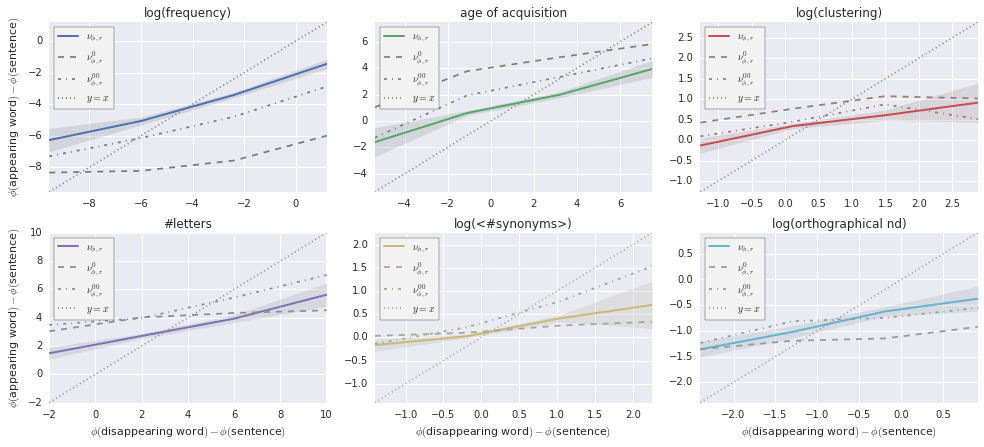

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

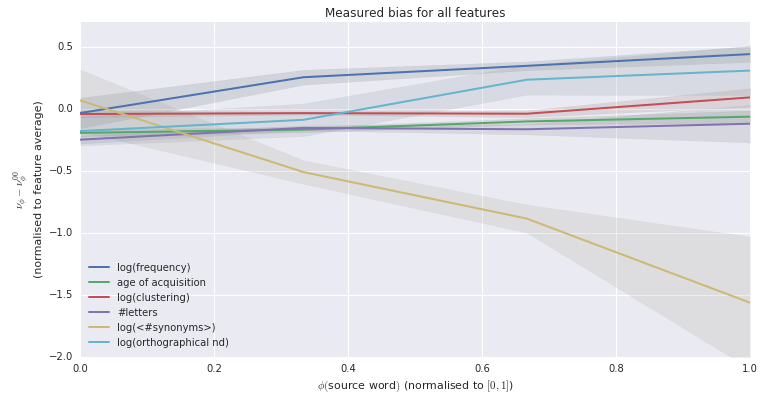

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

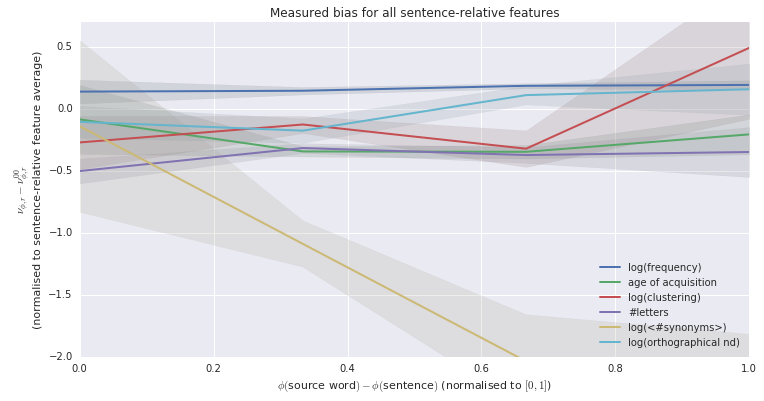

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


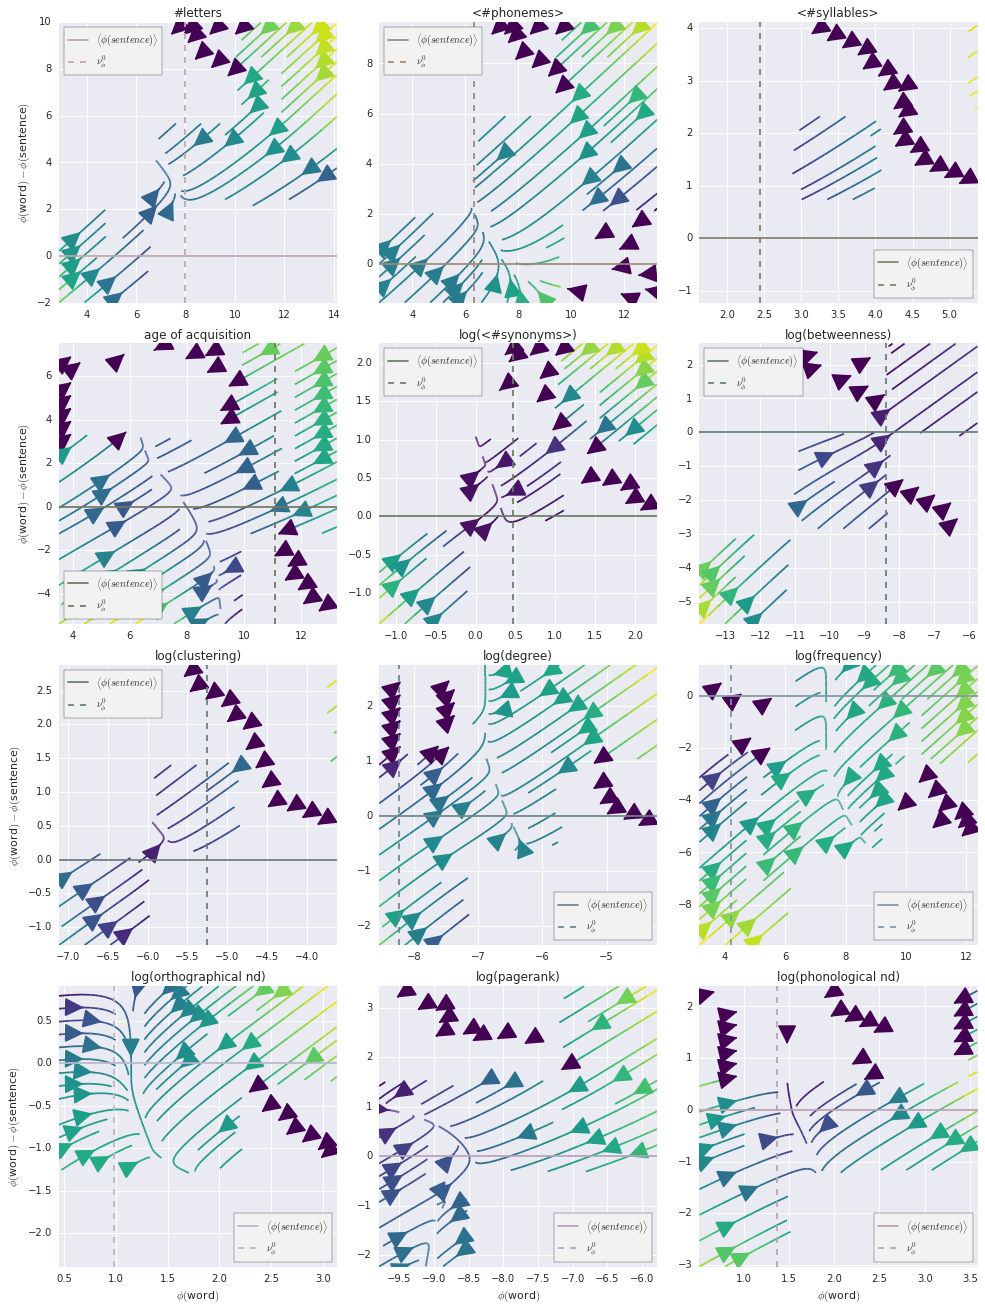

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


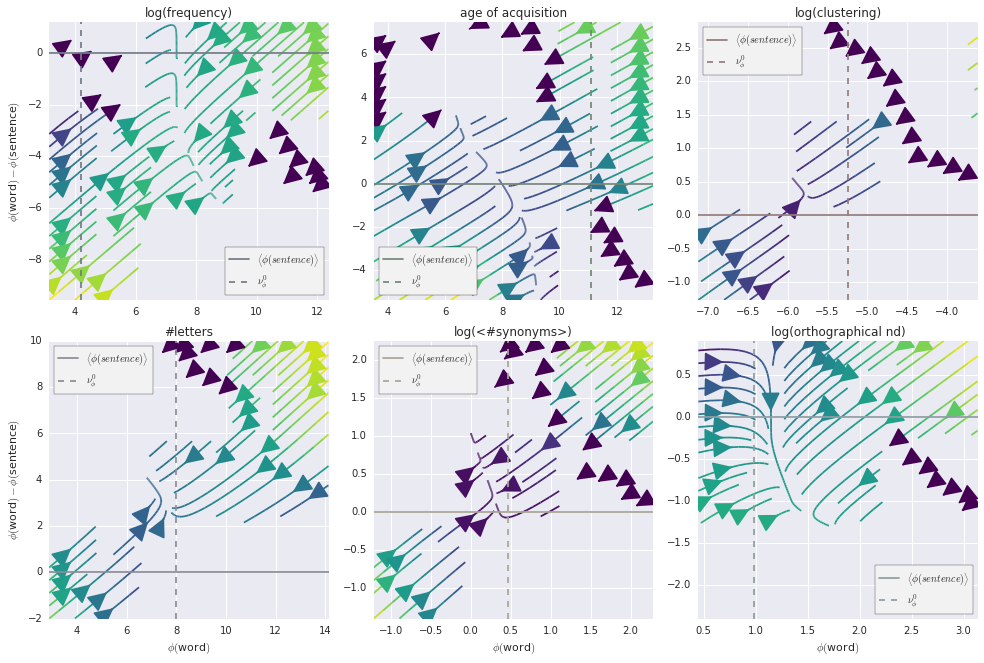

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51636549  0.18324794  0.09025577  0.07157499  0.03303064  0.0299692
  0.02044411  0.01827479  0.01537223  0.00930633  0.00703296]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.457567,0.291722,-0.085707,0.245454,0.226212,-0.427992,0.225573,0.288748,-0.401758,0.287221,-0.159415,-0.003360
Component-1,-0.316379,0.380367,-0.128416,0.296820,0.279213,0.428161,-0.179596,0.302016,0.426282,-0.243807,0.156541,-0.014821
Component-2,0.715908,0.218417,-0.126817,0.064582,0.625594,-0.114066,-0.004996,0.042003,-0.027028,0.083977,-0.003585,-0.074514


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 19760) |           | Elapsed Time: 0:00:43 ETA:  9 days, 21:27:48

  0% (  103 of 19760) |                    | Elapsed Time: 0:00:44 ETA:  0:02:30

  1% (  247 of 19760) |                    | Elapsed Time: 0:00:45 ETA:  0:02:09

  1% (  355 of 19760) |                    | Elapsed Time: 0:00:46 ETA:  0:02:11

  2% (  468 of 19760) |                    | Elapsed Time: 0:00:47 ETA:  0:02:10

  2% (  494 of 19760) |                    | Elapsed Time: 0:00:47 ETA:  0:02:09

  3% (  605 of 19760) |                    | Elapsed Time: 0:00:48 ETA:  0:02:08

  3% (  741 of 19760) |                    | Elapsed Time: 0:00:49 ETA:  0:02:04

  4% (  829 of 19760) |                    | Elapsed Time: 0:00:50 ETA:  0:02:06

  4% (  928 of 19760) |                    | Elapsed Time: 0:00:51 ETA:  0:02:13

  5% (  988 of 19760) |#                   | Elapsed Time: 0:00:52 ETA:  0:02:09

  5% ( 1084 of 19760) |#                   | Elapsed Time: 0:00:53 ETA:  0:02:11

  6% ( 1195 of 19760) |#                   | Elapsed Time: 0:00:54 ETA:  0:02:10

  6% ( 1235 of 19760) |#                   | Elapsed Time: 0:00:54 ETA:  0:02:08

  6% ( 1371 of 19760) |#                   | Elapsed Time: 0:00:55 ETA:  0:02:01

  7% ( 1482 of 19760) |#                   | Elapsed Time: 0:00:56 ETA:  0:02:00

  8% ( 1586 of 19760) |#                   | Elapsed Time: 0:00:57 ETA:  0:02:01

  8% ( 1684 of 19760) |#                   | Elapsed Time: 0:00:58 ETA:  0:01:58

  8% ( 1729 of 19760) |#                   | Elapsed Time: 0:00:58 ETA:  0:01:52

  9% ( 1866 of 19760) |#                   | Elapsed Time: 0:00:59 ETA:  0:01:49

 10% ( 1976 of 19760) |##                  | Elapsed Time: 0:01:00 ETA:  0:01:42

 10% ( 2076 of 19760) |##                  | Elapsed Time: 0:01:01 ETA:  0:01:43

 10% ( 2159 of 19760) |##                  | Elapsed Time: 0:01:02 ETA:  0:01:50

 11% ( 2223 of 19760) |##                  | Elapsed Time: 0:01:03 ETA:  0:01:53

 11% ( 2349 of 19760) |##                  | Elapsed Time: 0:01:04 ETA:  0:01:51

 12% ( 2470 of 19760) |##                  | Elapsed Time: 0:01:05 ETA:  0:01:46

 13% ( 2588 of 19760) |##                  | Elapsed Time: 0:01:06 ETA:  0:01:41

 13% ( 2717 of 19760) |##                  | Elapsed Time: 0:01:07 ETA:  0:01:46

 14% ( 2826 of 19760) |##                  | Elapsed Time: 0:01:08 ETA:  0:01:49

 14% ( 2925 of 19760) |##                  | Elapsed Time: 0:01:09 ETA:  0:01:48

 15% ( 2964 of 19760) |###                 | Elapsed Time: 0:01:09 ETA:  0:01:40

 15% ( 3089 of 19760) |###                 | Elapsed Time: 0:01:10 ETA:  0:01:38

 16% ( 3211 of 19760) |###                 | Elapsed Time: 0:01:11 ETA:  0:01:38

 16% ( 3305 of 19760) |###                 | Elapsed Time: 0:01:12 ETA:  0:01:44

 17% ( 3412 of 19760) |###                 | Elapsed Time: 0:01:13 ETA:  0:01:45

 17% ( 3458 of 19760) |###                 | Elapsed Time: 0:01:13 ETA:  0:01:42

 18% ( 3591 of 19760) |###                 | Elapsed Time: 0:01:14 ETA:  0:01:38

 18% ( 3676 of 19760) |###                 | Elapsed Time: 0:01:15 ETA:  0:01:42

 18% ( 3705 of 19760) |###                 | Elapsed Time: 0:01:16 ETA:  0:01:38

 19% ( 3815 of 19760) |###                 | Elapsed Time: 0:01:17 ETA:  0:01:39

 20% ( 3952 of 19760) |####                | Elapsed Time: 0:01:18 ETA:  0:01:38

 20% ( 4073 of 19760) |####                | Elapsed Time: 0:01:19 ETA:  0:01:31

 21% ( 4199 of 19760) |####                | Elapsed Time: 0:01:20 ETA:  0:01:24

 21% ( 4325 of 19760) |####                | Elapsed Time: 0:01:21 ETA:  0:01:23

 22% ( 4446 of 19760) |####                | Elapsed Time: 0:01:22 ETA:  0:01:23

 23% ( 4569 of 19760) |####                | Elapsed Time: 0:01:23 ETA:  0:01:15

 23% ( 4693 of 19760) |####                | Elapsed Time: 0:01:23 ETA:  0:01:12

 24% ( 4826 of 19760) |####                | Elapsed Time: 0:01:24 ETA:  0:01:07

 25% ( 4940 of 19760) |#####               | Elapsed Time: 0:01:25 ETA:  0:01:08

 25% ( 5071 of 19760) |#####               | Elapsed Time: 0:01:26 ETA:  0:01:07

 26% ( 5187 of 19760) |#####               | Elapsed Time: 0:01:27 ETA:  0:01:04

 26% ( 5322 of 19760) |#####               | Elapsed Time: 0:01:28 ETA:  0:01:03

 27% ( 5434 of 19760) |#####               | Elapsed Time: 0:01:29 ETA:  0:01:04

 28% ( 5569 of 19760) |#####               | Elapsed Time: 0:01:30 ETA:  0:01:02

 28% ( 5636 of 19760) |#####               | Elapsed Time: 0:01:31 ETA:  0:01:09

 28% ( 5681 of 19760) |#####               | Elapsed Time: 0:01:32 ETA:  0:01:12

 29% ( 5797 of 19760) |#####               | Elapsed Time: 0:01:33 ETA:  0:01:14

 30% ( 5928 of 19760) |######              | Elapsed Time: 0:01:34 ETA:  0:01:17

 30% ( 6032 of 19760) |######              | Elapsed Time: 0:01:35 ETA:  0:01:21

 31% ( 6175 of 19760) |######              | Elapsed Time: 0:01:36 ETA:  0:01:24

 31% ( 6262 of 19760) |######              | Elapsed Time: 0:01:37 ETA:  0:01:36

 32% ( 6347 of 19760) |######              | Elapsed Time: 0:01:38 ETA:  0:01:30

 32% ( 6422 of 19760) |######              | Elapsed Time: 0:01:39 ETA:  0:01:42

 33% ( 6524 of 19760) |######              | Elapsed Time: 0:01:40 ETA:  0:01:45

 33% ( 6630 of 19760) |######              | Elapsed Time: 0:01:41 ETA:  0:01:41

 33% ( 6669 of 19760) |######              | Elapsed Time: 0:01:42 ETA:  0:01:43

 34% ( 6785 of 19760) |######              | Elapsed Time: 0:01:43 ETA:  0:01:43

 35% ( 6916 of 19760) |#######             | Elapsed Time: 0:01:44 ETA:  0:01:36

 35% ( 7058 of 19760) |#######             | Elapsed Time: 0:01:45 ETA:  0:01:18

 36% ( 7136 of 19760) |#######             | Elapsed Time: 0:01:46 ETA:  0:01:16

 36% ( 7163 of 19760) |#######             | Elapsed Time: 0:01:46 ETA:  0:01:15

 36% ( 7290 of 19760) |#######             | Elapsed Time: 0:01:47 ETA:  0:01:08

 37% ( 7410 of 19760) |#######             | Elapsed Time: 0:01:48 ETA:  0:01:03

 38% ( 7520 of 19760) |#######             | Elapsed Time: 0:01:49 ETA:  0:01:03

 38% ( 7624 of 19760) |#######             | Elapsed Time: 0:01:50 ETA:  0:01:04

 38% ( 7657 of 19760) |#######             | Elapsed Time: 0:01:50 ETA:  0:01:02

 39% ( 7789 of 19760) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:03

 40% ( 7904 of 19760) |########            | Elapsed Time: 0:01:52 ETA:  0:00:54

 40% ( 8022 of 19760) |########            | Elapsed Time: 0:01:53 ETA:  0:00:53

 41% ( 8130 of 19760) |########            | Elapsed Time: 0:01:54 ETA:  0:00:56

 41% ( 8151 of 19760) |########            | Elapsed Time: 0:01:54 ETA:  0:00:58

 41% ( 8286 of 19760) |########            | Elapsed Time: 0:01:55 ETA:  0:00:53

 42% ( 8398 of 19760) |########            | Elapsed Time: 0:01:56 ETA:  0:00:52

 43% ( 8522 of 19760) |########            | Elapsed Time: 0:01:57 ETA:  0:00:47

 43% ( 8645 of 19760) |########            | Elapsed Time: 0:01:59 ETA:  0:00:49

 44% ( 8751 of 19760) |########            | Elapsed Time: 0:02:00 ETA:  0:00:50

 45% ( 8892 of 19760) |#########           | Elapsed Time: 0:02:01 ETA:  0:00:46

 45% ( 9033 of 19760) |#########           | Elapsed Time: 0:02:02 ETA:  0:00:39

 46% ( 9139 of 19760) |#########           | Elapsed Time: 0:02:03 ETA:  0:00:41

 46% ( 9265 of 19760) |#########           | Elapsed Time: 0:02:04 ETA:  0:00:37

 47% ( 9386 of 19760) |#########           | Elapsed Time: 0:02:05 ETA:  0:00:36

 48% ( 9509 of 19760) |#########           | Elapsed Time: 0:02:06 ETA:  0:00:34

 48% ( 9633 of 19760) |#########           | Elapsed Time: 0:02:07 ETA:  0:00:31

 49% ( 9746 of 19760) |#########           | Elapsed Time: 0:02:08 ETA:  0:00:31

 49% ( 9853 of 19760) |#########           | Elapsed Time: 0:02:09 ETA:  0:00:33

 50% ( 9880 of 19760) |##########          | Elapsed Time: 0:02:09 ETA:  0:00:38

 50% (10015 of 19760) |##########          | Elapsed Time: 0:02:10 ETA:  0:00:34

 51% (10127 of 19760) |##########          | Elapsed Time: 0:02:11 ETA:  0:00:35

 51% (10263 of 19760) |##########          | Elapsed Time: 0:02:12 ETA:  0:00:31

 52% (10374 of 19760) |##########          | Elapsed Time: 0:02:13 ETA:  0:00:31

 53% (10487 of 19760) |##########          | Elapsed Time: 0:02:14 ETA:  0:00:31

 53% (10591 of 19760) |##########          | Elapsed Time: 0:02:15 ETA:  0:00:33

 53% (10621 of 19760) |##########          | Elapsed Time: 0:02:15 ETA:  0:00:31

 54% (10723 of 19760) |##########          | Elapsed Time: 0:02:16 ETA:  0:00:31

 55% (10868 of 19760) |###########         | Elapsed Time: 0:02:17 ETA:  0:00:32

 55% (10992 of 19760) |###########         | Elapsed Time: 0:02:18 ETA:  0:00:30

 56% (11115 of 19760) |###########         | Elapsed Time: 0:02:19 ETA:  0:00:30

 56% (11240 of 19760) |###########         | Elapsed Time: 0:02:20 ETA:  0:00:29

 57% (11362 of 19760) |###########         | Elapsed Time: 0:02:21 ETA:  0:00:23

 58% (11498 of 19760) |###########         | Elapsed Time: 0:02:22 ETA:  0:00:16

 58% (11609 of 19760) |###########         | Elapsed Time: 0:02:23 ETA:  0:00:15

 59% (11738 of 19760) |###########         | Elapsed Time: 0:02:24 ETA:  0:00:09

 60% (11856 of 19760) |############        | Elapsed Time: 0:02:25 ETA:  0:00:07

 60% (11996 of 19760) |############        | Elapsed Time: 0:02:26 ETA:  0:00:05

 61% (12103 of 19760) |############        | Elapsed Time: 0:02:27 ETA:  0:00:00

 62% (12268 of 19760) |############        | Elapsed Time: 0:02:28 ETA:  0:00:00

 62% (12350 of 19760) |############        | Elapsed Time: 0:02:28 ETA:  0:00:00

 63% (12478 of 19760) |############        | Elapsed Time: 0:02:29 ETA:  0:00:00

 63% (12597 of 19760) |############        | Elapsed Time: 0:02:30 ETA:  0:00:00

 64% (12726 of 19760) |############        | Elapsed Time: 0:02:31 ETA:  0:00:00

 65% (12844 of 19760) |#############       | Elapsed Time: 0:02:32 ETA:  0:00:00

 65% (12977 of 19760) |#############       | Elapsed Time: 0:02:33 ETA:  0:00:00

 66% (13091 of 19760) |#############       | Elapsed Time: 0:02:34 ETA:  0:00:00

 66% (13208 of 19760) |#############       | Elapsed Time: 0:02:35 ETA:  0:00:00

 67% (13338 of 19760) |#############       | Elapsed Time: 0:02:36 ETA:  0:00:00

 68% (13473 of 19760) |#############       | Elapsed Time: 0:02:37 ETA:  0:00:00

 68% (13585 of 19760) |#############       | Elapsed Time: 0:02:38 ETA:  0:00:00

 69% (13709 of 19760) |#############       | Elapsed Time: 0:02:39 ETA:  0:00:00

 70% (13832 of 19760) |##############      | Elapsed Time: 0:02:40 ETA:  0:00:00

 70% (13970 of 19760) |##############      | Elapsed Time: 0:02:41 ETA:  0:00:00

 71% (14079 of 19760) |##############      | Elapsed Time: 0:02:42 ETA:  0:00:00

 72% (14256 of 19760) |##############      | Elapsed Time: 0:02:43 ETA:  0:00:00

 72% (14326 of 19760) |##############      | Elapsed Time: 0:02:43 ETA:  0:00:00

 73% (14464 of 19760) |##############      | Elapsed Time: 0:02:44 ETA:  0:00:00

 73% (14573 of 19760) |##############      | Elapsed Time: 0:02:45 ETA:  0:00:00

 74% (14722 of 19760) |##############      | Elapsed Time: 0:02:46 ETA:  0:00:00

 75% (14820 of 19760) |###############     | Elapsed Time: 0:02:47 ETA:  0:00:00

 75% (14920 of 19760) |###############     | Elapsed Time: 0:02:48 ETA:  0:00:00

 76% (15067 of 19760) |###############     | Elapsed Time: 0:02:49 ETA:  0:00:00

 76% (15181 of 19760) |###############     | Elapsed Time: 0:02:50 ETA:  0:00:00

 77% (15314 of 19760) |###############     | Elapsed Time: 0:02:51 ETA:  0:00:00

 78% (15440 of 19760) |###############     | Elapsed Time: 0:02:52 ETA:  0:00:00

 78% (15561 of 19760) |###############     | Elapsed Time: 0:02:53 ETA:  0:00:00

 79% (15685 of 19760) |###############     | Elapsed Time: 0:02:54 ETA:  0:00:00

 80% (15808 of 19760) |################    | Elapsed Time: 0:02:55 ETA:  0:00:00

 80% (15960 of 19760) |################    | Elapsed Time: 0:02:56 ETA:  0:00:00

 81% (16055 of 19760) |################    | Elapsed Time: 0:02:57 ETA:  0:00:00

 81% (16186 of 19760) |################    | Elapsed Time: 0:02:58 ETA:  0:00:00

 82% (16302 of 19760) |################    | Elapsed Time: 0:02:59 ETA:  0:00:00

 83% (16428 of 19760) |################    | Elapsed Time: 0:03:00 ETA:  0:00:00

 83% (16549 of 19760) |################    | Elapsed Time: 0:03:01 ETA:  0:00:00

 84% (16681 of 19760) |################    | Elapsed Time: 0:03:02 ETA:  0:00:00

 85% (16796 of 19760) |#################   | Elapsed Time: 0:03:03 ETA:  0:00:00

 85% (16919 of 19760) |#################   | Elapsed Time: 0:03:04 ETA:  0:00:00

 86% (17043 of 19760) |#################   | Elapsed Time: 0:03:05 ETA:  0:00:00

 86% (17172 of 19760) |#################   | Elapsed Time: 0:03:06 ETA:  0:00:00

 87% (17290 of 19760) |#################   | Elapsed Time: 0:03:06 ETA:  0:00:00

 88% (17440 of 19760) |#################   | Elapsed Time: 0:03:07 ETA:  0:00:00

 88% (17537 of 19760) |#################   | Elapsed Time: 0:03:08 ETA:  0:00:00

 89% (17665 of 19760) |#################   | Elapsed Time: 0:03:09 ETA:  0:00:00

 90% (17784 of 19760) |##################  | Elapsed Time: 0:03:10 ETA:  0:00:00

 90% (17875 of 19760) |##################  | Elapsed Time: 0:03:11 ETA:  0:00:00

 91% (18001 of 19760) |##################  | Elapsed Time: 0:03:12 ETA:  0:00:00

 91% (18031 of 19760) |##################  | Elapsed Time: 0:03:13 ETA:  0:00:00

 91% (18161 of 19760) |##################  | Elapsed Time: 0:03:14 ETA:  0:00:00

 92% (18278 of 19760) |##################  | Elapsed Time: 0:03:14 ETA:  0:00:00

 93% (18418 of 19760) |##################  | Elapsed Time: 0:03:15 ETA:  0:00:00

 93% (18525 of 19760) |##################  | Elapsed Time: 0:03:16 ETA:  0:00:00

 94% (18646 of 19760) |##################  | Elapsed Time: 0:03:17 ETA:  0:00:00

 95% (18772 of 19760) |################### | Elapsed Time: 0:03:18 ETA:  0:00:00

 95% (18868 of 19760) |################### | Elapsed Time: 0:03:19 ETA:  0:00:00

 96% (19019 of 19760) |################### | Elapsed Time: 0:03:20 ETA:  0:00:00

 96% (19163 of 19760) |################### | Elapsed Time: 0:03:21 ETA:  0:00:00

 97% (19266 of 19760) |################### | Elapsed Time: 0:03:22 ETA:  0:00:00

 98% (19398 of 19760) |################### | Elapsed Time: 0:03:23 ETA:  0:00:00

 98% (19513 of 19760) |################### | Elapsed Time: 0:03:24 ETA:  0:00:00

 99% (19644 of 19760) |################### | Elapsed Time: 0:03:25 ETA:  0:00:00

100% (19760 of 19760) |####################| Elapsed Time: 0:03:26 Time: 0:03:26


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

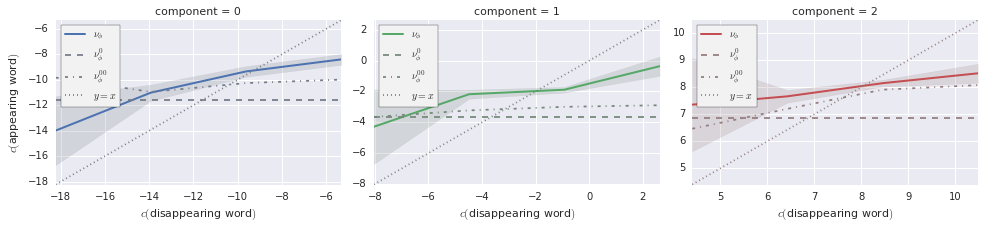

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.5395369   0.1874926   0.16385877  0.04362133  0.03686285]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.692631,-0.096784,0.337792,-0.558782,0.290765,0.003151
Component-1,-0.495610,-0.092634,0.388185,0.715532,-0.287536,0.020945
Component-2,0.514883,-0.110772,0.840265,-0.112860,-0.002758,-0.061922


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 19760) |           | Elapsed Time: 0:00:12 ETA:  2 days, 19:30:15

  0% (  116 of 19760) |                    | Elapsed Time: 0:00:13 ETA:  0:02:39

  1% (  247 of 19760) |                    | Elapsed Time: 0:00:14 ETA:  0:02:22

  1% (  383 of 19760) |                    | Elapsed Time: 0:00:15 ETA:  0:02:17

  2% (  494 of 19760) |                    | Elapsed Time: 0:00:16 ETA:  0:02:16

  3% (  618 of 19760) |                    | Elapsed Time: 0:00:17 ETA:  0:02:17

  3% (  741 of 19760) |                    | Elapsed Time: 0:00:17 ETA:  0:02:14

  4% (  838 of 19760) |                    | Elapsed Time: 0:00:18 ETA:  0:02:19

  4% (  947 of 19760) |                    | Elapsed Time: 0:00:20 ETA:  0:02:20

  5% (  988 of 19760) |#                   | Elapsed Time: 0:00:20 ETA:  0:02:20

  5% ( 1097 of 19760) |#                   | Elapsed Time: 0:00:21 ETA:  0:02:20

  6% ( 1235 of 19760) |#                   | Elapsed Time: 0:00:22 ETA:  0:02:18

  6% ( 1376 of 19760) |#                   | Elapsed Time: 0:00:23 ETA:  0:02:16

  7% ( 1482 of 19760) |#                   | Elapsed Time: 0:00:24 ETA:  0:02:15

  8% ( 1602 of 19760) |#                   | Elapsed Time: 0:00:25 ETA:  0:02:14

  8% ( 1729 of 19760) |#                   | Elapsed Time: 0:00:26 ETA:  0:02:13

  9% ( 1859 of 19760) |#                   | Elapsed Time: 0:00:27 ETA:  0:02:09

 10% ( 1976 of 19760) |##                  | Elapsed Time: 0:00:28 ETA:  0:02:07

 10% ( 2074 of 19760) |##                  | Elapsed Time: 0:00:29 ETA:  0:02:07

 10% ( 2169 of 19760) |##                  | Elapsed Time: 0:00:30 ETA:  0:02:15

 11% ( 2223 of 19760) |##                  | Elapsed Time: 0:00:30 ETA:  0:02:17

 11% ( 2366 of 19760) |##                  | Elapsed Time: 0:00:31 ETA:  0:02:14

 12% ( 2470 of 19760) |##                  | Elapsed Time: 0:00:32 ETA:  0:02:11

 13% ( 2603 of 19760) |##                  | Elapsed Time: 0:00:33 ETA:  0:02:06

 13% ( 2717 of 19760) |##                  | Elapsed Time: 0:00:34 ETA:  0:02:04

 14% ( 2843 of 19760) |##                  | Elapsed Time: 0:00:35 ETA:  0:02:04

 15% ( 2964 of 19760) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:04

 15% ( 3103 of 19760) |###                 | Elapsed Time: 0:00:37 ETA:  0:01:56

 16% ( 3211 of 19760) |###                 | Elapsed Time: 0:00:37 ETA:  0:01:48

 16% ( 3323 of 19760) |###                 | Elapsed Time: 0:00:38 ETA:  0:01:50

 17% ( 3458 of 19760) |###                 | Elapsed Time: 0:00:39 ETA:  0:01:50

 18% ( 3597 of 19760) |###                 | Elapsed Time: 0:00:40 ETA:  0:01:49

 18% ( 3705 of 19760) |###                 | Elapsed Time: 0:00:41 ETA:  0:01:54

 19% ( 3818 of 19760) |###                 | Elapsed Time: 0:00:42 ETA:  0:01:55

 20% ( 3952 of 19760) |####                | Elapsed Time: 0:00:44 ETA:  0:01:58

 20% ( 4066 of 19760) |####                | Elapsed Time: 0:00:45 ETA:  0:02:03

 21% ( 4167 of 19760) |####                | Elapsed Time: 0:00:46 ETA:  0:02:04

 21% ( 4199 of 19760) |####                | Elapsed Time: 0:00:46 ETA:  0:02:06

 21% ( 4341 of 19760) |####                | Elapsed Time: 0:00:47 ETA:  0:02:05

 22% ( 4446 of 19760) |####                | Elapsed Time: 0:00:48 ETA:  0:01:56

 23% ( 4587 of 19760) |####                | Elapsed Time: 0:00:49 ETA:  0:01:51

 23% ( 4693 of 19760) |####                | Elapsed Time: 0:00:49 ETA:  0:01:46

 24% ( 4835 of 19760) |####                | Elapsed Time: 0:00:50 ETA:  0:01:40

 25% ( 4940 of 19760) |#####               | Elapsed Time: 0:00:51 ETA:  0:01:38

 25% ( 5079 of 19760) |#####               | Elapsed Time: 0:00:52 ETA:  0:01:34

 26% ( 5187 of 19760) |#####               | Elapsed Time: 0:00:53 ETA:  0:01:29

 26% ( 5328 of 19760) |#####               | Elapsed Time: 0:00:54 ETA:  0:01:28

 27% ( 5434 of 19760) |#####               | Elapsed Time: 0:00:55 ETA:  0:01:30

 28% ( 5575 of 19760) |#####               | Elapsed Time: 0:00:56 ETA:  0:01:28

 28% ( 5681 of 19760) |#####               | Elapsed Time: 0:00:57 ETA:  0:01:35

 29% ( 5813 of 19760) |#####               | Elapsed Time: 0:00:58 ETA:  0:01:35

 30% ( 5928 of 19760) |######              | Elapsed Time: 0:00:59 ETA:  0:01:35

 30% ( 6051 of 19760) |######              | Elapsed Time: 0:01:00 ETA:  0:01:37

 31% ( 6175 of 19760) |######              | Elapsed Time: 0:01:01 ETA:  0:01:34

 31% ( 6282 of 19760) |######              | Elapsed Time: 0:01:02 ETA:  0:01:39

 32% ( 6422 of 19760) |######              | Elapsed Time: 0:01:03 ETA:  0:01:38

 33% ( 6574 of 19760) |######              | Elapsed Time: 0:01:04 ETA:  0:01:26

 33% ( 6669 of 19760) |######              | Elapsed Time: 0:01:05 ETA:  0:01:26

 34% ( 6790 of 19760) |######              | Elapsed Time: 0:01:06 ETA:  0:01:26

 35% ( 6916 of 19760) |#######             | Elapsed Time: 0:01:07 ETA:  0:01:26

 35% ( 7060 of 19760) |#######             | Elapsed Time: 0:01:08 ETA:  0:01:24

 36% ( 7163 of 19760) |#######             | Elapsed Time: 0:01:09 ETA:  0:01:26

 36% ( 7306 of 19760) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:22

 37% ( 7410 of 19760) |#######             | Elapsed Time: 0:01:10 ETA:  0:01:24

 38% ( 7541 of 19760) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:22

 38% ( 7657 of 19760) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:21

 39% ( 7800 of 19760) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:16

 40% ( 7904 of 19760) |########            | Elapsed Time: 0:01:14 ETA:  0:01:16

 40% ( 8035 of 19760) |########            | Elapsed Time: 0:01:15 ETA:  0:01:17

 41% ( 8151 of 19760) |########            | Elapsed Time: 0:01:16 ETA:  0:01:14

 41% ( 8295 of 19760) |########            | Elapsed Time: 0:01:17 ETA:  0:01:11

 42% ( 8398 of 19760) |########            | Elapsed Time: 0:01:18 ETA:  0:01:13

 43% ( 8522 of 19760) |########            | Elapsed Time: 0:01:19 ETA:  0:01:14

 43% ( 8645 of 19760) |########            | Elapsed Time: 0:01:20 ETA:  0:01:12

 44% ( 8769 of 19760) |########            | Elapsed Time: 0:01:21 ETA:  0:01:12

 45% ( 8892 of 19760) |#########           | Elapsed Time: 0:01:22 ETA:  0:01:11

 45% ( 9043 of 19760) |#########           | Elapsed Time: 0:01:23 ETA:  0:01:07

 46% ( 9139 of 19760) |#########           | Elapsed Time: 0:01:24 ETA:  0:01:06

 46% ( 9276 of 19760) |#########           | Elapsed Time: 0:01:25 ETA:  0:01:02

 47% ( 9386 of 19760) |#########           | Elapsed Time: 0:01:25 ETA:  0:01:02

 48% ( 9521 of 19760) |#########           | Elapsed Time: 0:01:26 ETA:  0:01:00

 48% ( 9633 of 19760) |#########           | Elapsed Time: 0:01:27 ETA:  0:00:58

 49% ( 9756 of 19760) |#########           | Elapsed Time: 0:01:28 ETA:  0:00:58

 50% ( 9880 of 19760) |##########          | Elapsed Time: 0:01:29 ETA:  0:00:57

 50% (10031 of 19760) |##########          | Elapsed Time: 0:01:30 ETA:  0:00:55

 51% (10127 of 19760) |##########          | Elapsed Time: 0:01:31 ETA:  0:00:56

 52% (10280 of 19760) |##########          | Elapsed Time: 0:01:32 ETA:  0:00:52

 52% (10374 of 19760) |##########          | Elapsed Time: 0:01:33 ETA:  0:00:52

 53% (10495 of 19760) |##########          | Elapsed Time: 0:01:34 ETA:  0:00:53

 53% (10621 of 19760) |##########          | Elapsed Time: 0:01:35 ETA:  0:00:53

 54% (10749 of 19760) |##########          | Elapsed Time: 0:01:36 ETA:  0:00:53

 55% (10868 of 19760) |###########         | Elapsed Time: 0:01:36 ETA:  0:00:49

 55% (11013 of 19760) |###########         | Elapsed Time: 0:01:38 ETA:  0:00:45

 56% (11115 of 19760) |###########         | Elapsed Time: 0:01:38 ETA:  0:00:46

 56% (11259 of 19760) |###########         | Elapsed Time: 0:01:39 ETA:  0:00:43

 57% (11362 of 19760) |###########         | Elapsed Time: 0:01:40 ETA:  0:00:43

 58% (11514 of 19760) |###########         | Elapsed Time: 0:01:41 ETA:  0:00:40

 58% (11609 of 19760) |###########         | Elapsed Time: 0:01:42 ETA:  0:00:37

 59% (11747 of 19760) |###########         | Elapsed Time: 0:01:43 ETA:  0:00:35

 60% (11856 of 19760) |############        | Elapsed Time: 0:01:43 ETA:  0:00:33

 60% (12008 of 19760) |############        | Elapsed Time: 0:01:44 ETA:  0:00:32

 61% (12103 of 19760) |############        | Elapsed Time: 0:01:45 ETA:  0:00:30

 62% (12276 of 19760) |############        | Elapsed Time: 0:01:46 ETA:  0:00:25

 62% (12350 of 19760) |############        | Elapsed Time: 0:01:47 ETA:  0:00:25

 63% (12481 of 19760) |############        | Elapsed Time: 0:01:48 ETA:  0:00:27

 63% (12597 of 19760) |############        | Elapsed Time: 0:01:48 ETA:  0:00:27

 64% (12738 of 19760) |############        | Elapsed Time: 0:01:49 ETA:  0:00:25

 65% (12844 of 19760) |#############       | Elapsed Time: 0:01:50 ETA:  0:00:24

 65% (12985 of 19760) |#############       | Elapsed Time: 0:01:51 ETA:  0:00:22

 66% (13091 of 19760) |#############       | Elapsed Time: 0:01:52 ETA:  0:00:23

 66% (13228 of 19760) |#############       | Elapsed Time: 0:01:53 ETA:  0:00:24

 67% (13338 of 19760) |#############       | Elapsed Time: 0:01:54 ETA:  0:00:27

 68% (13482 of 19760) |#############       | Elapsed Time: 0:01:55 ETA:  0:00:25

 68% (13585 of 19760) |#############       | Elapsed Time: 0:01:55 ETA:  0:00:24

 69% (13719 of 19760) |#############       | Elapsed Time: 0:01:56 ETA:  0:00:24

 70% (13832 of 19760) |##############      | Elapsed Time: 0:01:57 ETA:  0:00:24

 70% (13984 of 19760) |##############      | Elapsed Time: 0:01:58 ETA:  0:00:22

 71% (14079 of 19760) |##############      | Elapsed Time: 0:01:59 ETA:  0:00:21

 72% (14258 of 19760) |##############      | Elapsed Time: 0:02:00 ETA:  0:00:16

 72% (14326 of 19760) |##############      | Elapsed Time: 0:02:00 ETA:  0:00:15

 73% (14475 of 19760) |##############      | Elapsed Time: 0:02:01 ETA:  0:00:14

 73% (14573 of 19760) |##############      | Elapsed Time: 0:02:02 ETA:  0:00:13

 74% (14731 of 19760) |##############      | Elapsed Time: 0:02:03 ETA:  0:00:10

 75% (14820 of 19760) |###############     | Elapsed Time: 0:02:04 ETA:  0:00:08

 75% (14934 of 19760) |###############     | Elapsed Time: 0:02:05 ETA:  0:00:10

 76% (15067 of 19760) |###############     | Elapsed Time: 0:02:06 ETA:  0:00:10

 76% (15195 of 19760) |###############     | Elapsed Time: 0:02:07 ETA:  0:00:11

 77% (15314 of 19760) |###############     | Elapsed Time: 0:02:08 ETA:  0:00:15

 78% (15456 of 19760) |###############     | Elapsed Time: 0:02:09 ETA:  0:00:13

 78% (15561 of 19760) |###############     | Elapsed Time: 0:02:09 ETA:  0:00:13

 79% (15700 of 19760) |###############     | Elapsed Time: 0:02:10 ETA:  0:00:12

 80% (15808 of 19760) |################    | Elapsed Time: 0:02:11 ETA:  0:00:14

 80% (15963 of 19760) |################    | Elapsed Time: 0:02:12 ETA:  0:00:11

 81% (16055 of 19760) |################    | Elapsed Time: 0:02:13 ETA:  0:00:10

 81% (16197 of 19760) |################    | Elapsed Time: 0:02:14 ETA:  0:00:08

 82% (16302 of 19760) |################    | Elapsed Time: 0:02:15 ETA:  0:00:06

 83% (16442 of 19760) |################    | Elapsed Time: 0:02:16 ETA:  0:00:05

 83% (16549 of 19760) |################    | Elapsed Time: 0:02:16 ETA:  0:00:03

 84% (16693 of 19760) |################    | Elapsed Time: 0:02:17 ETA:  0:00:02

 85% (16796 of 19760) |#################   | Elapsed Time: 0:02:18 ETA:  0:00:03

 85% (16911 of 19760) |#################   | Elapsed Time: 0:02:19 ETA:  0:00:05

 86% (17043 of 19760) |#################   | Elapsed Time: 0:02:20 ETA:  0:00:06

 86% (17175 of 19760) |#################   | Elapsed Time: 0:02:21 ETA:  0:00:03

 87% (17290 of 19760) |#################   | Elapsed Time: 0:02:22 ETA:  0:00:08

 88% (17435 of 19760) |#################   | Elapsed Time: 0:02:23 ETA:  0:00:06

 88% (17537 of 19760) |#################   | Elapsed Time: 0:02:24 ETA:  0:00:10

 89% (17665 of 19760) |#################   | Elapsed Time: 0:02:25 ETA:  0:00:12

 90% (17784 of 19760) |##################  | Elapsed Time: 0:02:26 ETA:  0:00:11

 90% (17900 of 19760) |##################  | Elapsed Time: 0:02:27 ETA:  0:00:10

 91% (18031 of 19760) |##################  | Elapsed Time: 0:02:28 ETA:  0:00:07

 91% (18177 of 19760) |##################  | Elapsed Time: 0:02:29 ETA:  0:00:04

 92% (18278 of 19760) |##################  | Elapsed Time: 0:02:30 ETA:  0:00:00

 93% (18424 of 19760) |##################  | Elapsed Time: 0:02:31 ETA:  0:00:00

 93% (18525 of 19760) |##################  | Elapsed Time: 0:02:31 ETA:  0:00:00

 94% (18636 of 19760) |##################  | Elapsed Time: 0:02:33 ETA:  0:00:00

 95% (18772 of 19760) |################### | Elapsed Time: 0:02:34 ETA:  0:00:00

 95% (18873 of 19760) |################### | Elapsed Time: 0:02:35 ETA:  0:00:00

 96% (19019 of 19760) |################### | Elapsed Time: 0:02:36 ETA:  0:00:03

 96% (19143 of 19760) |################### | Elapsed Time: 0:02:37 ETA:  0:00:03

 97% (19266 of 19760) |################### | Elapsed Time: 0:02:38 ETA:  0:00:12

 98% (19404 of 19760) |################### | Elapsed Time: 0:02:39 ETA:  0:00:05

 98% (19513 of 19760) |################### | Elapsed Time: 0:02:40 ETA:  0:00:01

 99% (19648 of 19760) |################### | Elapsed Time: 0:02:41 ETA:  0:00:00

100% (19760 of 19760) |####################| Elapsed Time: 0:02:42 Time: 0:02:42


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

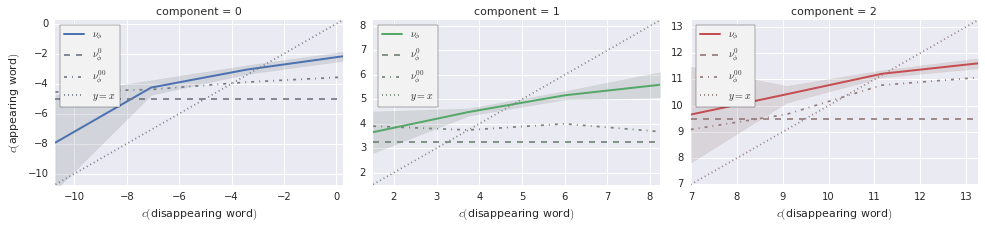

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1982 (cluster-unique) substitutions, but the PCA is in fact computed on 650 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.